Saving Dataset .csv to Dataset .csv
Number of Rows and Columns: (9551, 21)
Column Names:
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
Missing Values in Each Column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating 

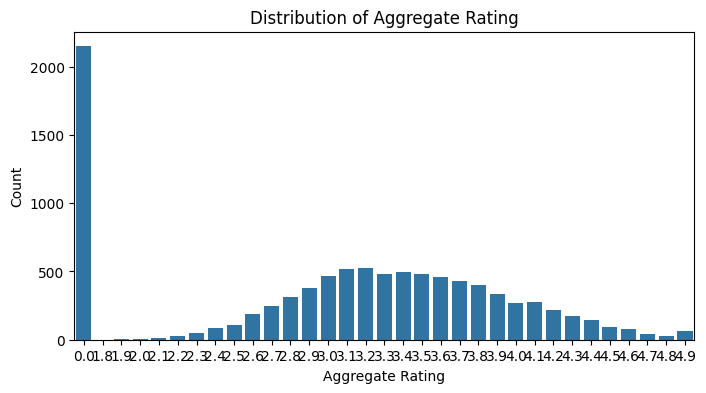

Aggregate Rating Counts:
Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64
Aggregate Rating Percentage:
Aggregate rating
0.0    22.489792
3.2     5.465396
3.1     5.433986
3.4     5.214114
3.3     5.057062
3.5     5.025652
3.0     4.900010
3.6     4.795309
3.7     4.470736
3.8     4.188043
2.9     3.989111
3.9     3.507486
2.8     3.298084
4.1     2.868810
4.0     2.785049
2.7     2.617527
4.2     2.313894
2.6     1.999791
4.3     1.821799
4.4     1.507696
2.5     1.151712
4.5     0.994660
2.4     0.910899
4.6     0.816668
4.9     0.638677
2.3     0.492095
4.7     0.439745
2.2     0.282693
4.8     0.2617

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

print("Number of Rows and Columns:", df.shape)
print("Column Names:")
print(df.columns)

print("Missing Values in Each Column:")
print(df.isnull().sum())

numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df['Aggregate rating'] = df['Aggregate rating'].astype(float)

plt.figure(figsize=(8,4))
sns.countplot(x='Aggregate rating', data=df)
plt.title("Distribution of Aggregate Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.show()

print("Aggregate Rating Counts:")
print(df['Aggregate rating'].value_counts())

print("Aggregate Rating Percentage:")
print(df['Aggregate rating'].value_counts(normalize=True) * 100)

df.to_csv('Cleaned_Dataset.csv', index=False)
print("Cleaned dataset saved successfully")
